#importing libraries

In [4]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime

In [5]:
train = pd.read_csv('/Users/suprithmekala/Desktop/Dataset/train.csv')
train_label = pd.read_csv('/Users/suprithmekala/Desktop/Dataset/train_label.csv',header=None)
test = pd.read_csv('/Users/suprithmekala/Desktop/Dataset/test.csv')
test_label = pd.read_csv('/Users/suprithmekala/Desktop/Dataset/test_label.csv',header=None)

In [6]:
train['Total_bookings'] = train_label[0]
test['Total_bookings'] = test_label[0]

#missing value Analysis - Task1

In [7]:
#missing value analysis - Task1
print(train.isnull().any())

datetime          False
season            False
holiday           False
workingday        False
weather           False
temp              False
atemp             False
humidity          False
windspeed         False
Total_bookings    False
dtype: bool


In [8]:
train.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  Total_bookings  
0  25.760        77    16.9979             504  
1  33.335        79    19.0012               5  
2   6.060        50    22.0028             139  
3  16.665        29     8.9981             209  
4  33.335        51    19.0012             184

In [9]:
train.shape

(8708, 10)

In [10]:
test.shape

(2178, 10)

In [11]:
train_label.shape

(8708, 1)

#Removing Unnecessary rows

In [12]:
#Removing Unnecessary rows
for index,row in train.iterrows():
    if row['holiday'] == 0 and row['workingday'] == 0:
        train.drop(index,inplace=True)
    if row['holiday'] == 1 and row['workingday'] == 1:
        train.drop(index,inplace=True)
        
for index,row in test.iterrows():
    if row['holiday'] == 0 and row['workingday'] == 0:
        test.drop(index,inplace=True)
    if row['holiday'] == 1 and row['workingday'] == 1:
        test.drop(index,inplace=True)

In [13]:
train.shape

(6172, 10)

In [14]:
train.dtypes

datetime           object
season             object
holiday             int64
workingday          int64
weather            object
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_bookings      int64
dtype: object

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [16]:
train.dtypes

datetime          datetime64[ns]
season                    object
holiday                    int64
workingday                 int64
weather                   object
temp                     float64
atemp                    float64
humidity                   int64
windspeed                float64
Total_bookings             int64
dtype: object

In [17]:
pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#Visualize data using different visualizations to generate interesting insights - Task1

In [18]:
#Visualize data using different visualizations to generate interesting insights - Task1
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total_bookings')

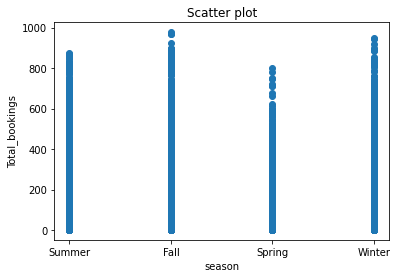

In [19]:
fig,ax = plt.subplots()
ax.scatter(train['season'],train['Total_bookings'])
ax.set_title('Scatter plot')
ax.set_xlabel('season')
ax.set_ylabel('Total_bookings')

In [20]:
train_season_grouped = train.groupby(['season'],as_index=False)['Total_bookings'].count()

In [21]:
train_season_grouped

season  Total_bookings
0    Fall            1553
1  Spring            1500
2  Summer            1566
3  Winter            1553

Text(0, 0.5, 'Total_bookings')

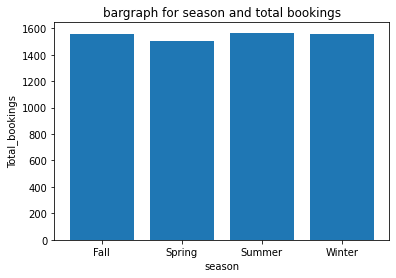

In [22]:
fig,ax= plt.subplots()
ax.bar(train_season_grouped['season'],train_season_grouped['Total_bookings'])
ax.set_title('bargraph for season and total bookings')
ax.set_xlabel('season')
ax.set_ylabel('Total_bookings')

In [23]:
train['weather'] = train['weather'].str.replace(",","+")

In [24]:
train['weather1'] = train.weather.apply(lambda x : x.split("+")[0])
train['weather2'] = train.weather.apply(lambda x : x.split("+")[1])

In [25]:
train.head()

datetime  season  holiday  workingday              weather  \
0 2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1 2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
2 2011-01-13 09:00:00  Spring        0           1   Clear + Few clouds   
3 2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4 2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_bookings weather1     weather2  
0  22.14  25.760        77    16.9979             504   Clear    Few clouds  
1  28.70  33.335        79    19.0012               5   Clear    Few clouds  
2   5.74   6.060        50    22.0028             139   Clear    Few clouds  
3  13.94  16.665        29     8.9981             209   Clear    Few clouds  
4  30.34  33.335        51    19.0012             184   Clear    Few clouds

In [26]:
train.loc[22]

datetime              2011-05-18 20:00:00
season                             Summer
holiday                                 0
workingday                              1
weather            Light Snow+ Light Rain
temp                                22.96
atemp                              26.515
humidity                               88
windspeed                          8.9981
Total_bookings                        213
weather1                       Light Snow
weather2                       Light Rain
Name: 22, dtype: object

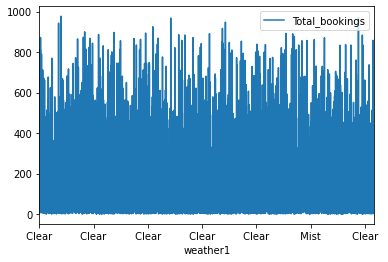

In [27]:
ax = plt.gca()

train.plot(kind='line',x='weather1',y='Total_bookings',ax=ax)
#train.plot(kind='line',x='weather2',y='Total_bookings', color='red', ax=ax)

plt.show()

In [28]:
train_weather1_grouped = train.groupby(['weather1'],as_index=False)['Total_bookings'].count()

In [29]:
train_weather1_grouped 

weather1  Total_bookings
0        Clear             4036
1   Heavy Rain                1
2    Light Snow             514
3         Mist             1621

In [30]:
train_weather2_grouped = train.groupby(['weather2'],as_index=False)['Total_bookings'].count()

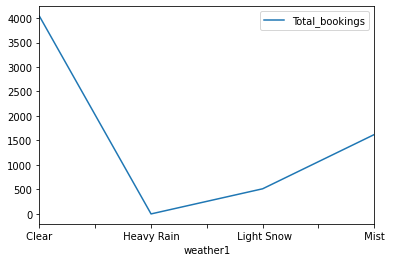

In [31]:
ax = plt.gca()

train_weather1_grouped.plot(kind='line',x='weather1',y='Total_bookings',ax=ax)

plt.show()

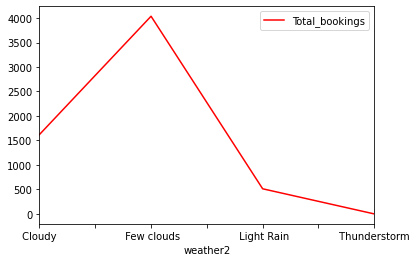

In [32]:
ax = plt.gca()
train_weather2_grouped.plot(kind='line',x='weather2',y='Total_bookings', color='red', ax=ax)
plt.show()

#Feature Engineering - Task2

In [33]:
#Feature Engineering - Task2
train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['Day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute

In [34]:
train.head()

datetime  season  holiday  workingday              weather  \
0 2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1 2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
2 2011-01-13 09:00:00  Spring        0           1   Clear + Few clouds   
3 2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4 2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_bookings weather1     weather2  \
0  22.14  25.760        77    16.9979             504   Clear    Few clouds   
1  28.70  33.335        79    19.0012               5   Clear    Few clouds   
2   5.74   6.060        50    22.0028             139   Clear    Few clouds   
3  13.94  16.665        29     8.9981             209   Clear    Few clouds   
4  30.34  33.335        51    19.0012             184   Clear    Few clouds   

         date  year  month  Day  hour  minute  
0  2012-05-02  2012      5    2    19       0  
1  2012-09-05  2012      9    5     4       0  
2  2011-01-13  2011      1   13     9       0  
3  2011-11-18  2011     11   18    16       0  
4  2011-09-13  2011      9   13    13       0

In [35]:
train_month_grouped = train.groupby(['month'],as_index=False)['temp','atemp','humidity','windspeed','Total_bookings'].sum()
train_year_grouped = train.groupby(['year'],as_index=False)['temp','atemp','humidity','windspeed','Total_bookings'].sum()
train_hour_grouped = train.groupby(['hour'],as_index=False)['temp','atemp','humidity','windspeed','Total_bookings'].sum()

In [36]:
train_month_grouped

month      temp      atemp  humidity  windspeed  Total_bookings
0       1   4552.64   5584.930     27284  7185.2274           45905
1       2   6085.22   7529.475     27676  6572.1640           58769
2       3   8003.20   9555.195     28015  7625.1561           75505
3       4   9939.22  11821.735     28672  8239.0972           94900
4       5  12148.30  14269.015     36573  7275.0074          116722
5       6  13678.42  15678.995     29885  7083.0859          120170
6       7  16122.84  18212.345     30329  5513.0414          126143
7       8  16381.96  18035.075     33123  6230.1826          131645
8       9  12476.30  14294.320     34804  5629.1792          112494
9      10  11248.76  13222.770     36938  5468.2318          123542
10     11   8163.92   9829.290     32769  7152.2031           99795
11     12   7158.60   8804.260     33580  5829.2479           93552

#Visualize data using different visualizations to generate interesting insights - Task1

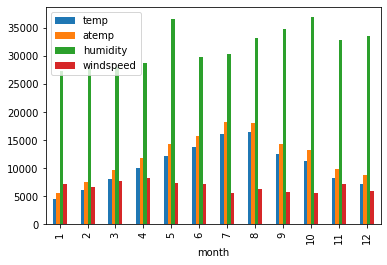

In [37]:
ax = plt.gca()

train_month_grouped.plot(kind='bar',x='month',y=['temp','atemp','humidity','windspeed'],ax=ax)

#train.plot(kind='line',x='weather2',y='Total_bookings', color='red', ax=ax)

plt.show()

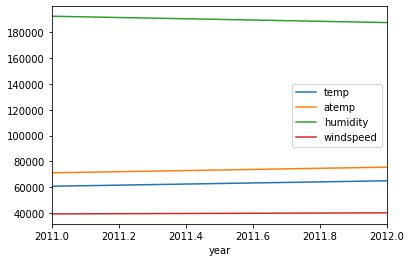

In [38]:
ax = plt.gca()
train_year_grouped.plot(kind='line',x='year',y=['temp','atemp','humidity','windspeed'],ax=ax)
plt.show()

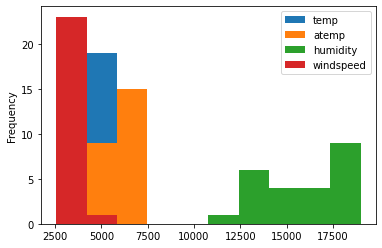

In [39]:
ax = plt.gca()
train_hour_grouped.plot(kind='hist',x='hour',y=['temp','atemp','humidity','windspeed'],ax=ax)
plt.show()

In [40]:
pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#Visualizing Total_booking Vs other features to generate insights - Task1

In [41]:
#Visualizing Total_booking Vs other features to generate insights - Task1
import seaborn as sns

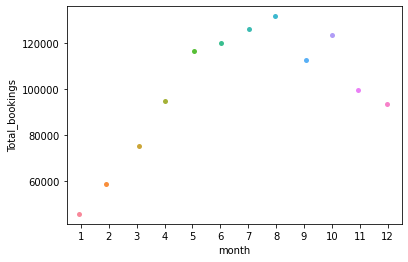

In [42]:
ax = sns.stripplot(train_month_grouped['month'],train_month_grouped['Total_bookings'])

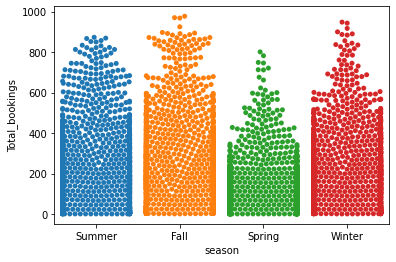

In [43]:
ax = sns.swarmplot(train['season'],train['Total_bookings'])

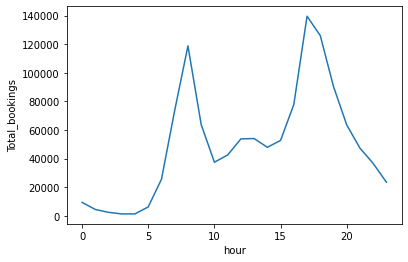

In [44]:
ay = sns.lineplot(train_hour_grouped['hour'],train_hour_grouped['Total_bookings'])

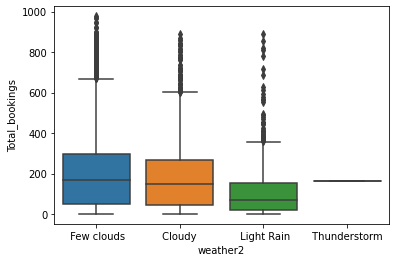

In [45]:
ay = sns.boxplot(train['weather2'],train['Total_bookings'])

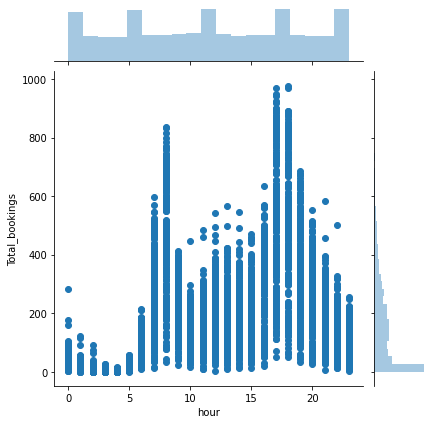

In [46]:
az = sns.jointplot(train['hour'],train['Total_bookings'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


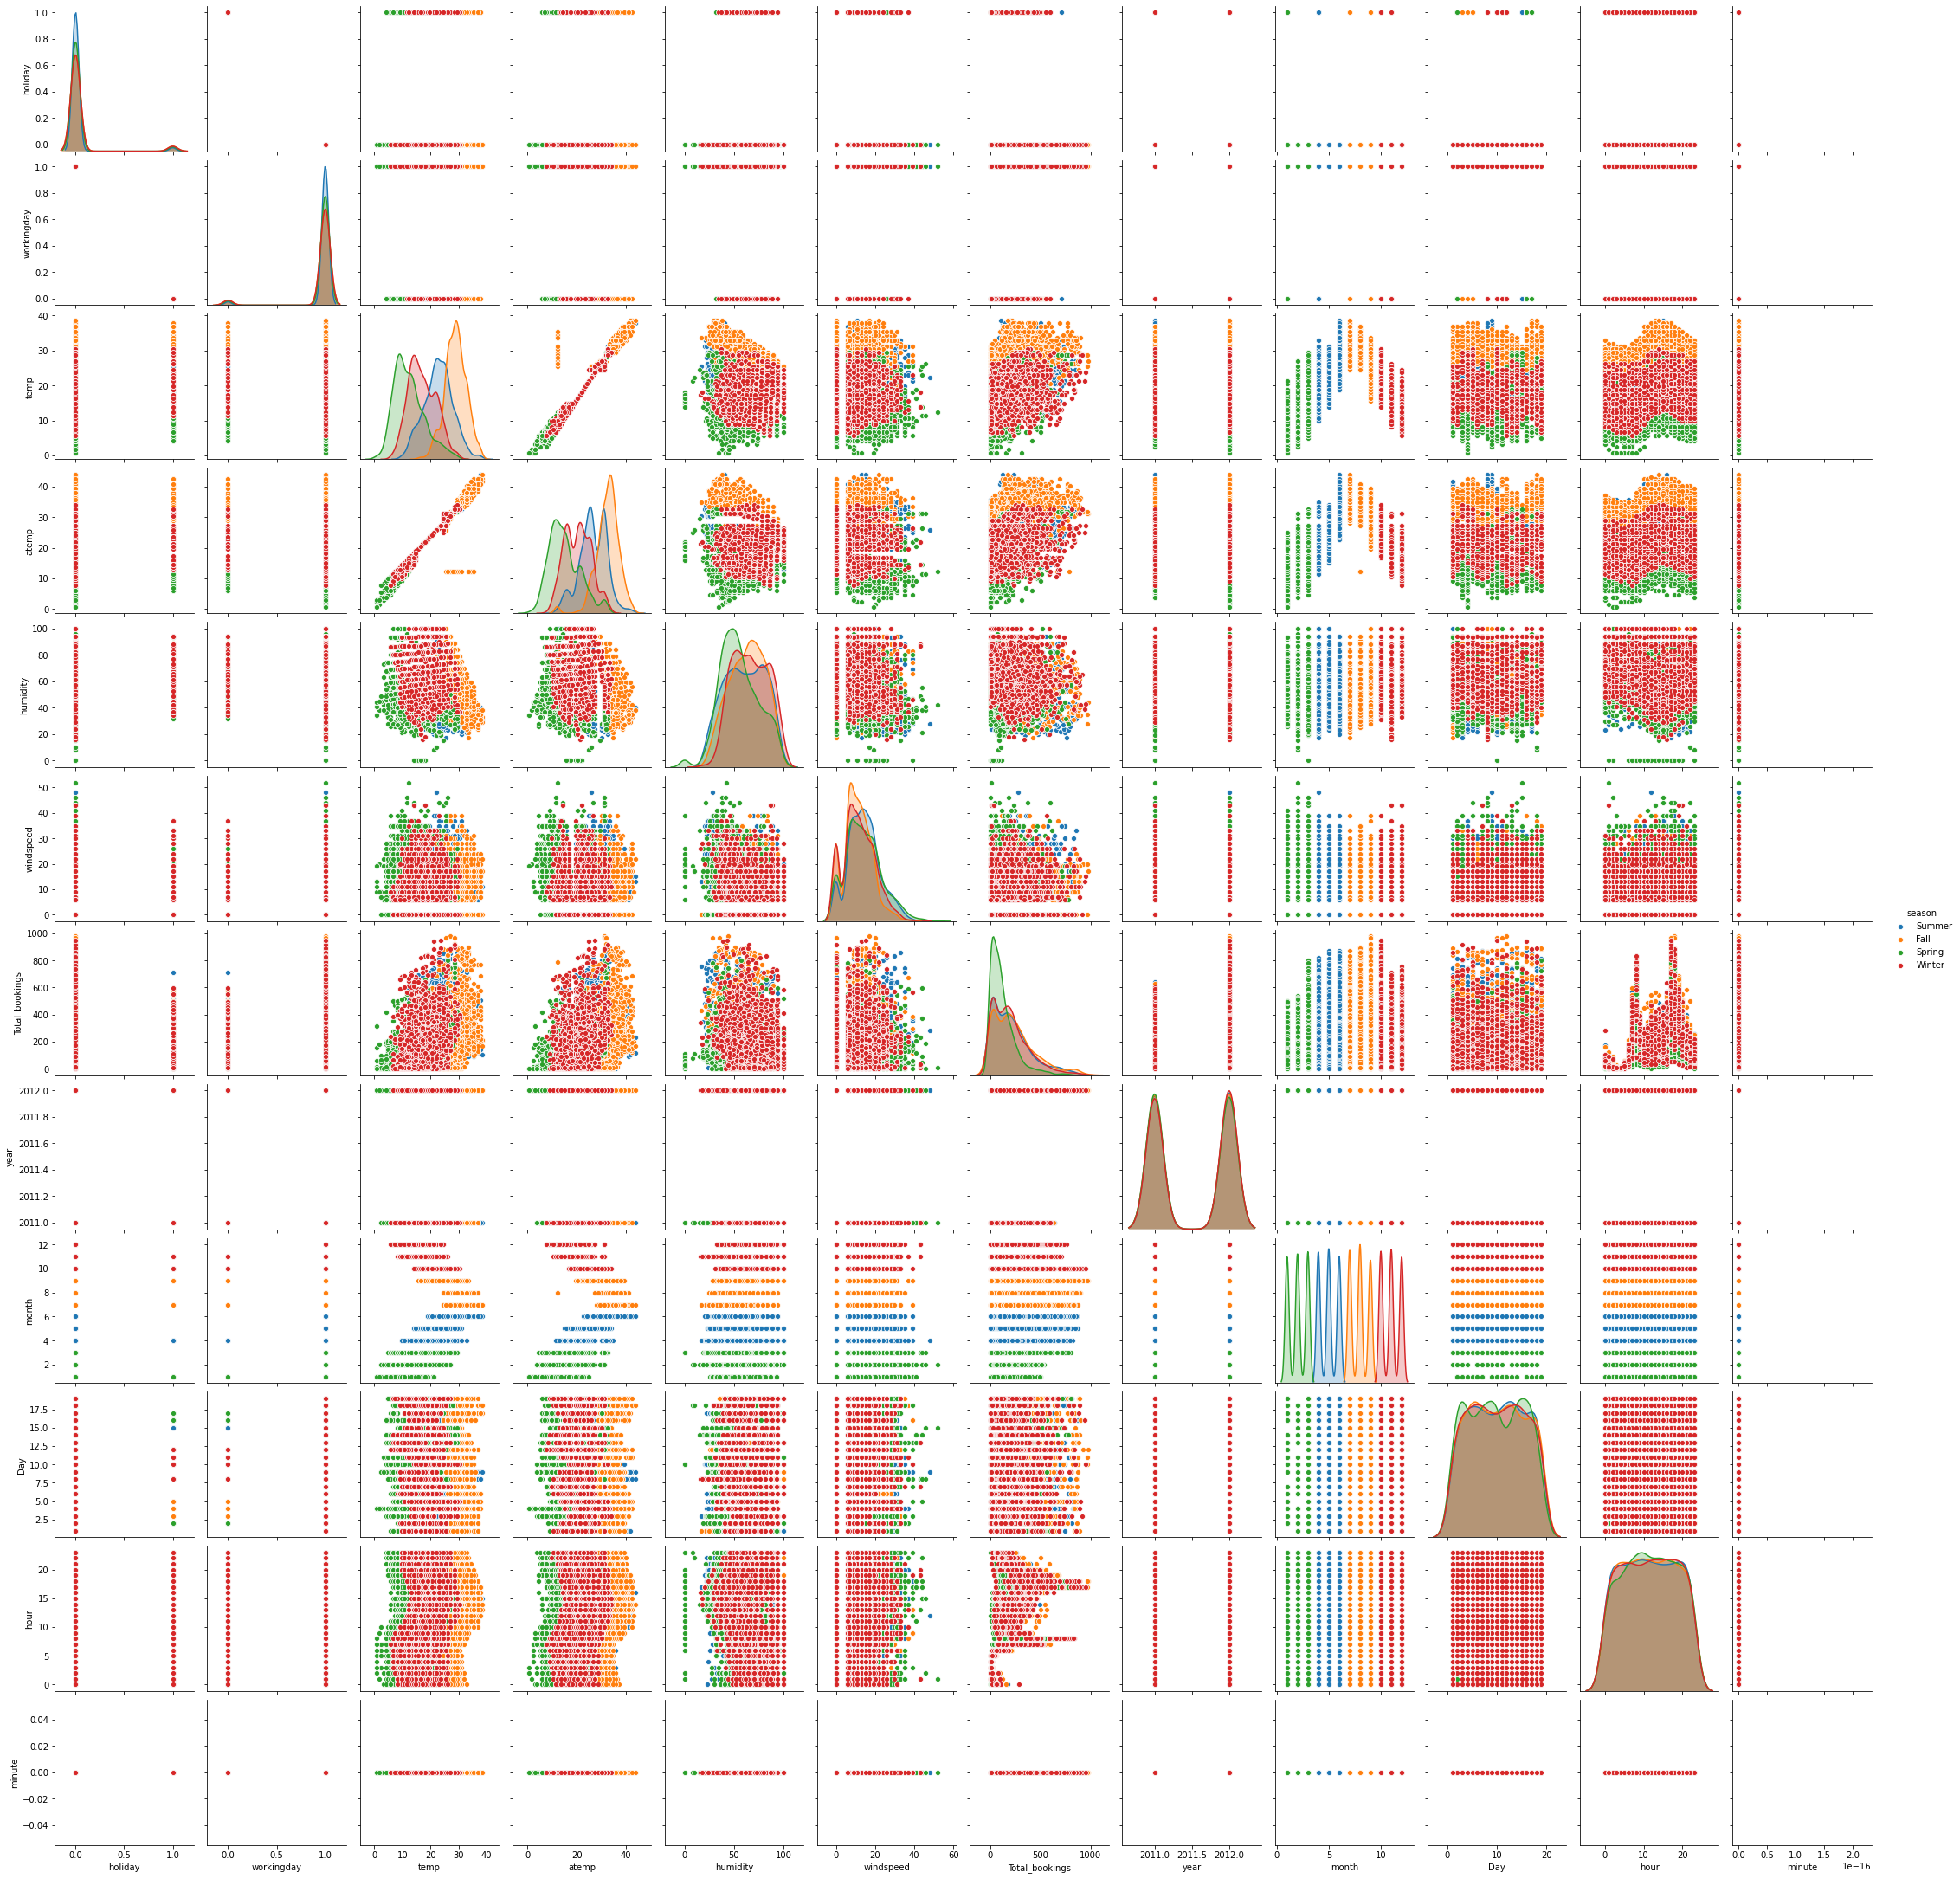

In [47]:
sns.pairplot(data = train, hue = "season")

#outliner analysis - Task1

In [48]:
#outliner analysis - Task1
from scipy import stats

In [49]:
z_score = stats.zscore(train[['temp','atemp','humidity','windspeed','Total_bookings']])

In [50]:
z_score

array([[ 0.22124292,  0.23185864,  0.80763611,  0.49663711,  1.68144161],
       [ 1.05930126,  1.12380161,  0.91192353,  0.7411929 , -1.02764881],
       [-1.87390293, -2.08778182, -0.60024405,  1.10761762, -0.30015759],
       ...,
       [ 0.43075751,  0.41024724, -0.28738179, -0.47995021, -1.04936496],
       [-1.14060188, -1.19583885, -0.02666324,  0.49663711, -0.55532242],
       [-1.87390293, -2.08778182, -0.60024405,  0.86306184, -0.8864938 ]])

In [51]:
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 2).all(axis=1)
new_train = train[filtered_entries]

print(new_train)

                datetime  season  holiday  workingday              weather  \
0    2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1    2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
3    2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4    2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   
7    2012-09-10 04:00:00    Fall        0           1   Clear + Few clouds   
...                  ...     ...      ...         ...                  ...   
8701 2012-11-01 00:00:00  Winter        0           1   Clear + Few clouds   
8702 2011-01-06 13:00:00  Spring        0           1   Clear + Few clouds   
8704 2011-11-10 01:00:00  Winter        0           1       Mist + Cloudy    
8705 2011-04-12 03:00:00  Summer        0           1       Mist + Cloudy    
8706 2012-11-07 01:00:00  Winter        0           1       Mist + Cloudy    

       temp   atemp  humidity  windspeed  Total_bookings weathe

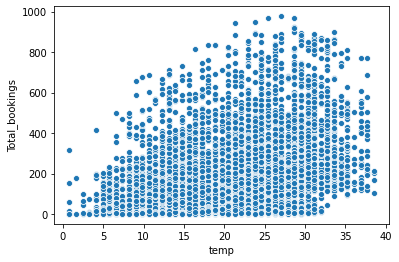

In [52]:
#finding outliners using seaborn
ax = sns.scatterplot(train['temp'],train['Total_bookings'])

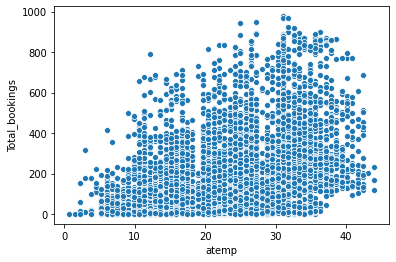

In [53]:
ax = sns.scatterplot(train['atemp'],train['Total_bookings'])

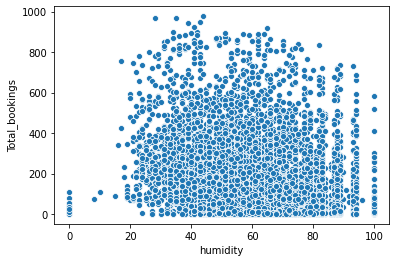

In [54]:
ax = sns.scatterplot(train['humidity'],train['Total_bookings'])

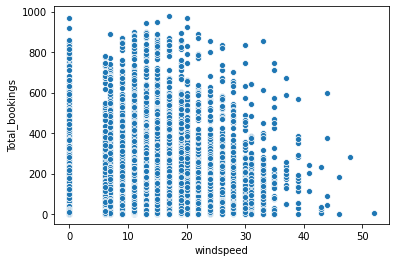

In [55]:
ax = sns.scatterplot(train['windspeed'],train['Total_bookings'])

#correlation analysis - Task1

In [56]:
#correlation analysis - Task1
train.corr(method='pearson')

holiday  workingday      temp     atemp  humidity  windspeed  \
holiday         1.000000   -1.000000 -0.004514 -0.009870 -0.003993   0.007506   
workingday     -1.000000    1.000000  0.004514  0.009870  0.003993  -0.007506   
temp           -0.004514    0.004514  1.000000  0.980558 -0.055924  -0.022498   
atemp          -0.009870    0.009870  0.980558  1.000000 -0.033569  -0.063513   
humidity       -0.003993    0.003993 -0.055924 -0.033569  1.000000  -0.300735   
windspeed       0.007506   -0.007506 -0.022498 -0.063513 -0.300735   1.000000   
Total_bookings -0.006594    0.006594  0.357367  0.351537 -0.260044   0.086848   
year            0.014711   -0.014711  0.064280  0.059157 -0.069277   0.003001   
month           0.000860   -0.000860  0.276089  0.279450  0.220246  -0.134766   
Day            -0.025070    0.025070  0.037131  0.034593  0.044514   0.012272   
hour            0.004130   -0.004130  0.144055  0.139054 -0.283908   0.122970   
minute               NaN         NaN       NaN       NaN       NaN        NaN   

                Total_bookings      year     month       Day      hour  minute  
holiday              -0.006594  0.014711  0.000860 -0.025070  0.004130     NaN  
workingday            0.006594 -0.014711 -0.000860  0.025070 -0.004130     NaN  
temp                  0.357367  0.064280  0.276089  0.037131  0.144055     NaN  
atemp                 0.351537  0.059157  0.279450  0.034593  0.139054     NaN  
humidity             -0.260044 -0.069277  0.220246  0.044514 -0.283908     NaN  
windspeed             0.086848  0.003001 -0.134766  0.012272  0.122970     NaN  
Total_bookings        1.000000  0.269654  0.167680  0.015361  0.408816     NaN  
year                  0.269654  1.000000  0.006224  0.008315  0.006055     NaN  
month                 0.167680  0.006224  1.000000  0.012428 -0.008681     NaN  
Day                   0.015361  0.008315  0.012428  1.000000  0.013139     NaN  
hour                  0.408816  0.006055 -0.008681  0.013139  1.000000     NaN  
minute                     NaN       NaN       NaN       NaN       NaN     NaN

In [57]:
train = train.drop(columns = 'minute')

In [58]:
train.corr(method='kendall')

holiday  workingday      temp     atemp  humidity  windspeed  \
holiday         1.000000   -1.000000 -0.002489 -0.006726 -0.005532   0.007951   
workingday     -1.000000    1.000000  0.002489  0.006726  0.005532  -0.007951   
temp           -0.002489    0.002489  1.000000  0.950291 -0.028837  -0.010146   
atemp          -0.006726    0.006726  0.950291  1.000000 -0.023557  -0.032177   
humidity       -0.005532    0.005532 -0.028837 -0.023557  1.000000  -0.218493   
windspeed       0.007951   -0.007951 -0.010146 -0.032177 -0.218493   1.000000   
Total_bookings -0.000151    0.000151  0.255326  0.251932 -0.210641   0.082679   
year            0.014711   -0.014711  0.050104  0.044108 -0.059380   0.001911   
month           0.001016   -0.001016  0.186304  0.181134  0.150951  -0.089932   
Day            -0.021058    0.021058  0.024272  0.018960  0.031125   0.011124   
hour            0.003502   -0.003502  0.094053  0.092741 -0.198266   0.087001   

                Total_bookings      year     month       Day      hour  
holiday              -0.000151  0.014711  0.001016 -0.021058  0.003502  
workingday            0.000151 -0.014711 -0.001016  0.021058 -0.003502  
temp                  0.255326  0.050104  0.186304  0.024272  0.094053  
atemp                 0.251932  0.044108  0.181134  0.018960  0.092741  
humidity             -0.210641 -0.059380  0.150951  0.031125 -0.198266  
windspeed             0.082679  0.001911 -0.089932  0.011124  0.087001  
Total_bookings        1.000000  0.193627  0.123418  0.014183  0.351342  
year                  0.193627  1.000000  0.005287  0.006642  0.005098  
month                 0.123418  0.005287  1.000000  0.008432 -0.006062  
Day                   0.014183  0.006642  0.008432  1.000000  0.009140  
hour                  0.351342  0.005098 -0.006062  0.009140  1.000000

In [59]:
traincorr = train.corr(method='spearman')
traincorr

holiday  workingday      temp     atemp  humidity  windspeed  \
holiday         1.000000   -1.000000 -0.003004 -0.008125 -0.006717   0.009372   
workingday     -1.000000    1.000000  0.003004  0.008125  0.006717  -0.009372   
temp           -0.003004    0.003004  1.000000  0.982724 -0.042625  -0.014520   
atemp          -0.008125    0.008125  0.982724  1.000000 -0.037281  -0.046439   
humidity       -0.006717    0.006717 -0.042625 -0.037281  1.000000  -0.304096   
windspeed       0.009372   -0.009372 -0.014520 -0.046439 -0.304096   1.000000   
Total_bookings -0.000184    0.000184  0.372946  0.369202 -0.313381   0.120023   
year            0.014711   -0.014711  0.060466  0.053280 -0.072103   0.002253   
month           0.001195   -0.001195  0.263640  0.258629  0.217006  -0.121694   
Day            -0.025137    0.025137  0.034551  0.027061  0.043492   0.016206   
hour            0.004203   -0.004203  0.138788  0.136808 -0.289007   0.125023   

                Total_bookings      year     month       Day      hour  
holiday              -0.000184  0.014711  0.001195 -0.025137  0.004203  
workingday            0.000184 -0.014711 -0.001195  0.025137 -0.004203  
temp                  0.372946  0.060466  0.263640  0.034551  0.138788  
atemp                 0.369202  0.053280  0.258629  0.027061  0.136808  
humidity             -0.313381 -0.072103  0.217006  0.043492 -0.289007  
windspeed             0.120023  0.002253 -0.121694  0.016206  0.125023  
Total_bookings        1.000000  0.236722  0.178255  0.020677  0.524769  
year                  0.236722  1.000000  0.006221  0.007928  0.006117  
month                 0.178255  0.006221  1.000000  0.012447 -0.008543  
Day                   0.020677  0.007928  0.012447  1.000000  0.013123  
hour                  0.524769  0.006117 -0.008543  0.013123  1.000000

#. Feature Engineering - Task2

In [60]:
#. Feature Engineering - Task2
test['datetime'] = pd.to_datetime(test['datetime'])
test['date'] = test['datetime'].dt.date
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['Day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [61]:
test.head()

datetime  season  holiday  workingday              weather  \
0 2012-05-10 11:00:00  Summer        0           1   Clear + Few clouds   
3 2011-10-13 11:00:00  Winter        0           1       Mist + Cloudy    
5 2011-04-01 23:00:00  Summer        0           1   Clear + Few clouds   
7 2012-11-01 18:00:00  Winter        0           1       Mist + Cloudy    
8 2012-10-12 16:00:00  Winter        0           1   Clear + Few clouds   

    temp   atemp  humidity  windspeed  Total_bookings        date  year  \
0  21.32  25.000        48    35.0008             256  2012-05-10  2012   
3  25.42  28.790        83     0.0000              84  2011-10-13  2011   
5  12.30  15.910        61     6.0032              53  2011-04-01  2011   
7  16.40  20.455        50    11.0014             678  2012-11-01  2012   
8  18.86  22.725        41    23.9994             520  2012-10-12  2012   

   month  Day  hour  
0      5   10    11  
3     10   13    11  
5      4    1    23  
7     11    1    18  
8     10   12    16

#Correlation Analysis - Task1

In [62]:
#Correlation Analysis - Task1
train.corrwith(test)

holiday          -0.008061
workingday       -0.008061
temp             -0.006993
atemp            -0.012115
humidity          0.012365
windspeed        -0.008863
Total_bookings   -0.021988
year              0.032497
month            -0.061292
Day              -0.024825
hour              0.028740
dtype: float64

In [63]:
test.corrwith(test)

holiday           1.0
workingday        1.0
temp              1.0
atemp             1.0
humidity          1.0
windspeed         1.0
Total_bookings    1.0
year              1.0
month             1.0
Day               1.0
hour              1.0
dtype: float64

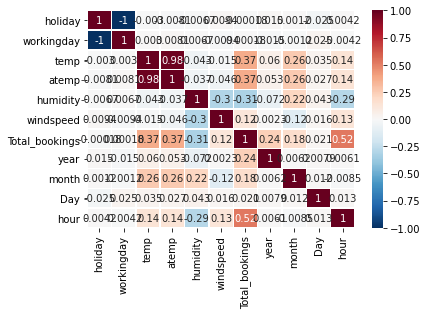

In [64]:
sns.heatmap(traincorr, 
            xticklabels=traincorr.columns,
            yticklabels=traincorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#Feature Engineering - Task2

In [65]:
#Feature Engineering
train['Rank'] = train['Total_bookings'].rank()

In [66]:
train.tail()

datetime  season  holiday  workingday              weather  \
8703 2012-01-16 06:00:00  Spring        1           0   Clear + Few clouds   
8704 2011-11-10 01:00:00  Winter        0           1       Mist + Cloudy    
8705 2011-04-12 03:00:00  Summer        0           1       Mist + Cloudy    
8706 2012-11-07 01:00:00  Winter        0           1       Mist + Cloudy    
8707 2011-01-10 10:00:00  Spring        0           1       Mist + Cloudy    

       temp   atemp  humidity  windspeed  Total_bookings weather1  \
8703   4.10   6.820        54     6.0032              13   Clear    
8704  16.40  20.455        87     0.0000              11    Mist    
8705  23.78  27.275        56     8.9981               1    Mist    
8706  11.48  13.635        61    16.9979              92    Mist    
8707   5.74   6.060        50    19.9995              31    Mist    

         weather2        date  year  month  Day  hour    Rank  
8703   Few clouds  2012-01-16  2012      1   16     6   871.5  
8704      Cloudy   2011-11-10  2011     11   10     1   784.0  
8705      Cloudy   2011-04-12  2011      4   12     3    35.0  
8706      Cloudy   2012-11-07  2012     11    7     1  2226.0  
8707      Cloudy   2011-01-10  2011      1   10    10  1338.5

In [67]:
X_train = train[['temp','atemp','humidity','windspeed','hour','year','month']]

In [68]:
Y_train = train['Total_bookings']

In [69]:
pip install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#ensemble model and grid search - Task2

In [70]:
#grid search for ensemble model - Task2
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
param_grid = {'max_depth':[3,7,10],'min_samples_split':[2,5,10]
             }

In [72]:
X_test = test[['temp','atemp','humidity','windspeed','hour','year','month']]
Y_test = test['Total_bookings']

In [73]:
dt = DecisionTreeRegressor()
grid_search_dt = GridSearchCV(dt,param_grid=param_grid)

In [74]:
grid_search_dt.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             pre_dispatch='2*n_jobs', refit

In [75]:
grid_search_dt.best_score_

0.8907595116262916

In [76]:
grid_search_dt.best_params_

{'max_depth': 10, 'min_samples_split': 10}

In [77]:
rf = RandomForestRegressor()

In [78]:
param_grid_rf = {'n_estimators':[50,100,150,200,250,300]}

In [79]:
grid_search_rf = GridSearchCV(rf,param_grid=param_grid_rf)

In [80]:
grid_search_rf.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [81]:
grid_search_rf.best_params_

{'n_estimators': 200}

In [82]:
grid_search_rf.best_score_

0.914376787233407

In [83]:
param_grid_nb = {'n_neighbors':[2,3,5,7,9,10,11,12,15,18,20,25,30]}

#Regression Analysis and grid search - Task2

In [84]:
#Regression Analysis and grid search - Task2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knnc = KNeighborsClassifier()
grid_search_nb = GridSearchCV(knn,param_grid = param_grid_nb)
grid_search_nbc = GridSearchCV(knnc,param_grid = param_grid_nb)

In [85]:
grid_search_nb.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 10, 11, 12, 15, 18, 20,
                                         25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
grid_search_nb.best_score_

0.511492587645171

In [87]:
grid_search_nb.best_params_

{'n_neighbors': 7}

In [88]:
param_grid_gb = {'n_estimators':[50,100],'learning_rate':[0.2,0.5,1.0]}

In [89]:
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb,param_grid = param_grid_gb)

In [90]:
grid_search_gb.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [91]:
grid_search_gb.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

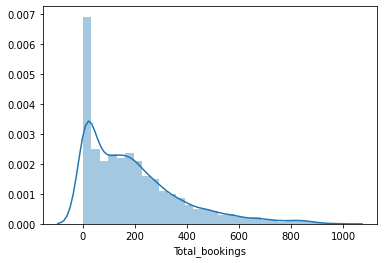

In [92]:
sns.distplot(train['Total_bookings'],bins=30)
plt.show()

# Regression analysis Linear, Lasso and ridge Regression

In [93]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
Y_test_pred = ln.predict(X_test)

In [95]:
Y_test_pred

array([262.94940748, 156.69152709, 181.21891468, ..., 303.36831174,
        11.91715379, 335.18195797])

In [96]:
from sklearn.metrics import mean_squared_error
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
rmse_linear

147.07143375388378

In [97]:
from sklearn.metrics import r2_score
r2_linear = r2_score(Y_test, Y_test_pred)
r2_linear

0.35020667729572474

In [98]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [99]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [100]:
#grid search for regression analysis
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso,param_grid = lasso_params)
grid_search_lasso.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
grid_search_lasso.best_score_

0.34990430251850413

In [102]:
grid_search_lasso.best_params_

{'alpha': 0.03}

In [103]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge,param_grid = ridge_params)
grid_search_ridge.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300,
                                   500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
grid_search_ridge.best_score_

0.34880890763186995

In [105]:
grid_search_ridge.best_params_

{'alpha': 200}

In [106]:
rid = Ridge(alpha = 200)
rid.fit(X_train,Y_train)

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [107]:
Y_test_pred_ridge = rid.predict(X_test)

In [108]:
Y_test_pred_ridge

array([257.92745911, 161.77805017, 185.8730179 , ..., 297.97593649,
        16.46687652, 330.25224928])

In [109]:
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge))
rmse_ridge

147.16679542349107

In [110]:
r2_ridge = r2_score(Y_test, Y_test_pred_ridge)
r2_ridge

0.3493637472465393

In [111]:
las = Lasso(alpha = 0.03)
las.fit(X_train,Y_train)
Y_test_pred_lasso = las.predict(X_test)
Y_test_pred_lasso

array([262.85560906, 156.77700877, 181.26284815, ..., 303.28495616,
        11.97003378, 335.11240878])

In [112]:
rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso))
rmse_lasso

147.07142754032242

In [113]:
r2_lasso = r2_score(Y_test, Y_test_pred_lasso)
r2_lasso

0.3502067322014327

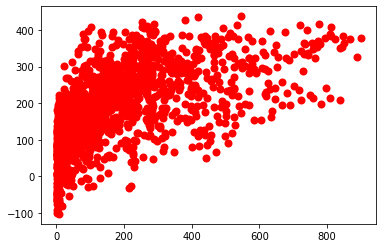

In [114]:
#plt.scatter(X_test, y_test,  color='gray')
plt.scatter(Y_test, Y_test_pred, color='red', linewidth=2)
plt.show()

In [115]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
df

Actual   Predicted
0        256  262.949407
3         84  156.691527
5         53  181.218915
7        678  323.590778
8        520  334.345644
...      ...         ...
2173       3  136.304103
2174     144  130.072826
2175     159  303.368312
2176      29   11.917154
2177     224  335.181958

[1551 rows x 2 columns]

Ensemble model - Decion Tree, Random Forest, Kneigbors, Gradient boost

In [116]:
clf = DecisionTreeRegressor(max_depth = 7, min_samples_split = 10)

In [117]:
clf.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [118]:
y_pred_dt = clf.predict(X_test)

In [119]:
y_pred_dt

array([260.75      , 166.77833333,  27.25641026, ..., 176.88888889,
        22.96385542, 402.60714286])

In [120]:
r2score_dt = r2_score(Y_test,y_pred_dt)
r2score_dt

0.883413878392043

In [121]:
rmse_dt = np.sqrt(mean_squared_error(Y_test,y_pred_dt))
rmse_dt

62.29656947104744

In [122]:
rf = RandomForestRegressor(n_estimators=250)

In [123]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
y_pred_rf = rf.predict(X_test)

In [125]:
y_pred_rf

array([224.384 , 114.176 ,  41.216 , ..., 147.024 ,  20.176 , 381.8352])

In [126]:
r2Score_rf = r2_score(Y_test,y_pred_rf)
r2Score_rf

0.9285074958386837

In [127]:
rmse_rf = np.sqrt(mean_squared_error(Y_test,y_pred_rf))
rmse_rf

48.78327568128837

In [128]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_rf})
df1

Actual  Predicted
0        256   224.3840
3         84   114.1760
5         53    41.2160
7        678   534.5440
8        520   399.8320
...      ...        ...
2173       3     3.5600
2174     144    91.6040
2175     159   147.0240
2176      29    20.1760
2177     224   381.8352

[1551 rows x 2 columns]

In [129]:
knr = KNeighborsRegressor(n_neighbors = 7)
knr.fit(X_train,Y_train)
Y_test_predict_knr = knr.predict(X_test)
r2scoreknr = r2_score(Y_test,Y_test_predict_knr)
r2scoreknr

0.530687449586666

In [130]:
rmse_knr = np.sqrt(mean_squared_error(Y_test,Y_test_predict_knr))
rmse_knr

124.98899852901545

In [131]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.5)
gbr.fit(X_train,Y_train)
Y_test_predict_gbr = gbr.predict(X_test)
r2score_gbr = r2_score(Y_test,Y_test_predict_gbr)
r2score_gbr

0.92551727218136

In [132]:
rmse_gbr = np.sqrt(mean_squared_error(Y_test,Y_test_predict_gbr))
rmse_gbr

49.79302269029369

In [133]:
X_new_train = train[['temp','atemp','humidity','windspeed','Total_bookings']]
Y_new_train = train['workingday']

In [134]:
X_new_test = test[['temp','atemp','humidity','windspeed','Total_bookings']]
Y_new_test = test['workingday']

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lg = LogisticRegression()

In [137]:
lg.fit(X_new_train,Y_new_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
Y_pred_lg = lg.predict(X_new_test)

In [139]:
Y_pred_lg

array([1, 1, 1, ..., 1, 1, 1])

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_new_test,Y_pred_lg)

0.9593810444874274

In [141]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(Y_new_test,Y_pred_lg,average='weighted')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9204119885217873

In [142]:
recall_score(Y_new_test,Y_pred_lg,average='weighted')

0.9593810444874274

In [143]:
f1_score(Y_new_test,Y_pred_lg)

0.979269496544916

In [144]:
X_new_train_scaled = scale(train[['temp','atemp','humidity','windspeed','Total_bookings']])

In [145]:
X_new_test_scaled = scale(test[['temp','atemp','humidity','windspeed','Total_bookings']])

In [146]:
grid_search_nbc.fit(X_new_train_scaled,Y_new_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 10, 11, 12, 15, 18, 20,
                                         25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
grid_search_nbc.best_params_

{'n_neighbors': 7}

In [148]:
knn = KNeighborsClassifier(n_neighbors=7)

In [149]:
knn.fit(X_new_train_scaled,Y_new_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [150]:
Y_test_pred_knn = knn.predict(X_new_test_scaled)

In [151]:
accuracy_score(Y_new_test,Y_test_pred_knn)

0.9600257898130239

In [152]:
precision_score(Y_new_test,Y_test_pred_knn,average='weighted')

0.9486552811639402

In [153]:
recall_score(Y_new_test,Y_test_pred_knn,average='micro')

0.9600257898130239

In [154]:
f1_score(Y_new_test,Y_test_pred_knn)

0.979578392621871

In [155]:
gd_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=0.5)

In [156]:
gd_clf.fit(X_new_train_scaled,Y_new_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [157]:
Y_test_pred_gd = gd_clf.predict(X_new_test_scaled)

In [158]:
accuracy_score(Y_new_test,Y_test_pred_gd)

0.9548678272082527

In [159]:
precision_score(Y_new_test,Y_test_pred_gd,average='weighted')

0.9202353153405959

In [160]:
recall_score(Y_new_test,Y_test_pred_gd,average='micro')

0.9548678272082527

In [161]:
f1_score(Y_new_test,Y_test_pred_gd)

0.9769129287598944

#conclusions

##Task1

1. Visualization of has done using matplotlib and seaborn libraries and plotted the graaphs
2. Outliners are analysed and removed unnessary rows
3. Missing values are analysed and there are no missing values
4. Visualization is done with respect to total bookings with other features
5 . Correlation has been analysed with pearson,kendal and spearman models and best correclation is found between
     ['temp','atemp','hour'] with ['Total_bookings']
    
##Task2

1 . Feature engineering is done on datetime and weather columns and divided them into date,hour,day,minute,weather1 and weather2

2 . Grid search is done for different regressors and ensemble models and applied best hyper parameter values.

3. Regression analysis is done with linear,ridge and lasso and best regression model and best r2_score is given below
    


In [171]:
print(np.round(r2_linear,8))
print(np.round(r2_lasso,8))
print(r2_ridge)

# best regression model is lasso and with r2_score of 0.35020673

0.35020668
0.35020673
0.3493637472465393


4. Ensemble Model is applied with Decion Tree, Random Forest, Kneigbors, Gradient boost and best model is randomforest
    best r2_score for enseble model is 0.9285

In [175]:
print(r2scoreknr,r2score_dt,r2Score_rf,r2score_gbr)


0.530687449586666 0.883413878392043 0.9285074958386837 0.92551727218136
